# Boston Housing Price Prediction

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("BostonHousing.csv")

In [66]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Data Preprocessing

In [67]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [69]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [70]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [71]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

## > Splitting Data

In [72]:
x = df.iloc[:,0:-1].values

In [73]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [74]:
y = df.iloc[:,-1].values

In [75]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.3)

In [78]:
trainx

array([[1.28160e-01, 1.25000e+01, 6.07000e+00, ..., 1.89000e+01,
        3.96900e+02, 8.79000e+00],
       [1.28023e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.40520e+02, 2.37900e+01],
       [1.28020e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.95240e+02, 1.22700e+01],
       ...,
       [2.73100e-02, 0.00000e+00, 7.07000e+00, ..., 1.78000e+01,
        3.96900e+02, 9.14000e+00],
       [3.51000e-02, 9.50000e+01, 2.68000e+00, ..., 1.47000e+01,
        3.92780e+02, 3.81000e+00],
       [9.59571e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.76110e+02, 2.03100e+01]])

In [79]:
testx

array([[8.7070e-02, 0.0000e+00, 1.2830e+01, ..., 1.8700e+01, 3.8696e+02,
        1.0270e+01],
       [5.7529e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8591e+02,
        2.4700e+00],
       [1.5086e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 3.9509e+02,
        1.8060e+01],
       ...,
       [2.5199e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8943e+02,
        1.8060e+01],
       [8.2210e-02, 2.2000e+01, 5.8600e+00, ..., 1.9100e+01, 3.8609e+02,
        3.5300e+00],
       [3.8214e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8738e+02,
        3.1300e+00]])

## > Linear Regression

In [80]:
from sklearn import linear_model

In [81]:
lm = linear_model.LinearRegression()

In [82]:
lm.fit(trainx,trainy)

LinearRegression()

In [83]:
y_pred = lm.predict(testx)

In [84]:
y_pred

array([23.19204825, 37.08020412, 11.59406317, 13.75778807, 18.42608118,
       14.79369632, 19.07171795, 18.34332901, 20.01928633, 23.48184479,
       25.87382186, 19.93814638,  3.1994978 , 21.91702095, 15.49293493,
       40.95473466, 29.68129021, -4.00662497, 15.80327878, 25.12569245,
       21.01838142, 15.71707562, 16.78493781, 28.43328771, 22.15285898,
       19.42436246, 34.60079935, 12.94357212, 20.05103949, 19.40044998,
       18.43975244, 23.04349344, 20.95745974, 33.0686196 , 29.70355204,
       16.40656618, 27.66101734, 16.00330188, 28.41672856, 37.62867938,
       21.52971894, 35.08464044, 21.37986092, 26.17475493, 17.10227645,
       18.8869343 , 17.71915786, 13.77512512,  9.7529016 , 22.47474582,
       18.68590269,  8.32607941, 23.65464419, 36.3062598 , 20.06291204,
        8.06328486, 25.90593042, 20.83378487, 24.02932263, 14.72473756,
       23.32789795, 25.81837307, 18.42744934, 30.1138822 , 14.70901484,
       25.22938347, 24.17678654, 20.84112424, 29.25118472, 31.82

In [85]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(testy, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(testy, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(testy, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(testy, y_pred), 2)) 
r = round(sm.r2_score(testy, y_pred), 2)
print("R2 score =", r*100)

Mean absolute error = 3.54
Mean squared error = 23.59
Median absolute error = 2.47
Explain variance score = 0.73
R2 score = 0.73


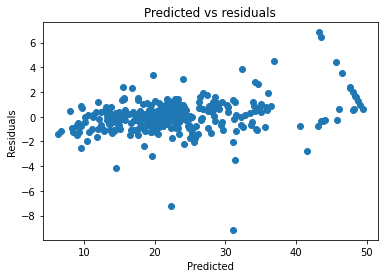

In [101]:
# Checking residuals
plt.scatter(y_pred,trainy-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## > Random Forest Regressor

In [92]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(trainx, trainy)

RandomForestRegressor()

In [95]:
# Model prediction on train data
y_pred2 = reg.predict(trainx)

In [96]:
y_pred2

array([21.034, 10.618, 19.942, 36.821, 32.195, 34.008, 30.397, 28.384,
       20.262, 23.049, 12.369, 27.925, 23.162, 24.752, 21.088, 14.571,
       19.551, 22.362, 19.786, 11.168, 24.055, 17.905, 21.147, 26.87 ,
       21.809, 20.768, 19.171, 19.527, 31.163, 21.043, 23.605, 48.692,
       20.673, 17.247, 31.32 , 44.07 , 16.692, 12.903, 23.225, 29.592,
       19.165, 20.716, 19.488, 17.044, 21.744, 18.332, 22.091, 18.35 ,
       27.513, 49.362, 20.783, 22.599, 18.983, 13.651, 17.614, 22.608,
       22.41 , 22.301, 22.264, 26.412, 21.583, 23.424, 32.128, 23.513,
       18.344, 12.097, 29.488, 32.537, 14.38 , 14.596, 31.061, 19.057,
       29.563, 22.926, 24.28 , 28.51 , 14.286, 20.186, 11.343, 15.646,
       16.483, 21.68 , 19.795, 11.32 , 14.031, 20.654, 19.865,  8.957,
       23.445, 35.863, 40.58 , 43.052, 33.715, 24.172, 20.402, 15.471,
       21.731, 13.582, 31.054, 24.399, 19.239, 20.361, 32.821, 15.701,
       28.345, 19.661, 15.012, 14.513, 17.773, 34.987, 14.927, 20.109,
      

In [125]:
r1=sm.r2_score(trainy, y_pred2)
print('Acc :',r1*100)

Acc : 0.9787438722581607


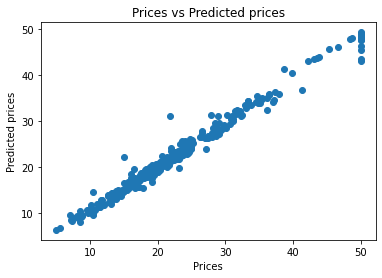

In [99]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(trainy, y_pred2)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

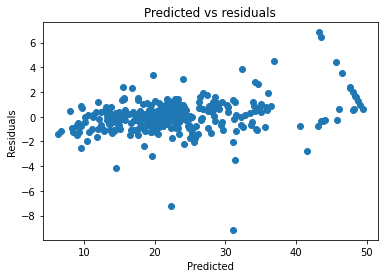

In [100]:
# Checking residuals
plt.scatter(y_pred2,trainy-y_pred2)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## > Decision Tree Regressor

In [102]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
dt =regressor.fit(trainx,trainy)

In [103]:
y_pred3 = dt.predict(testx)

In [106]:
y_pred3

array([21.02788462, 50.        , 19.765     , 16.3       , 14.25      ,
       16.3       , 10.95      , 21.02788462, 21.02788462, 21.02788462,
       21.02788462, 21.02788462, 13.825     , 21.02788462, 16.3       ,
       49.46      , 35.        ,  8.18333333, 16.3       , 23.96785714,
       23.96785714, 16.3       , 17.55      , 26.81363636, 21.02788462,
       21.02788462, 32.04      , 19.765     , 16.3       , 21.02788462,
       21.02788462, 19.765     , 21.02788462, 28.18333333, 21.02788462,
       16.3       , 23.96785714, 16.3       , 31.7       , 49.46      ,
       21.02788462, 32.04      , 15.        , 21.02788462, 50.        ,
       14.25      , 10.64166667, 10.64166667, 17.43333333, 21.02788462,
       14.25      , 10.64166667, 21.02788462, 32.04      , 19.77142857,
        8.18333333, 21.02788462, 21.02788462, 21.02788462, 16.3       ,
       21.02788462, 26.81363636, 19.77142857, 23.96785714, 14.25      ,
       23.96785714, 23.96785714, 21.02788462, 22.98      , 26.81

In [120]:
r2 = dt.score(testx, testy)
print('Acc: ',r2*100)

Acc:  0.778239294370086


In [107]:
from sklearn.tree import plot_tree

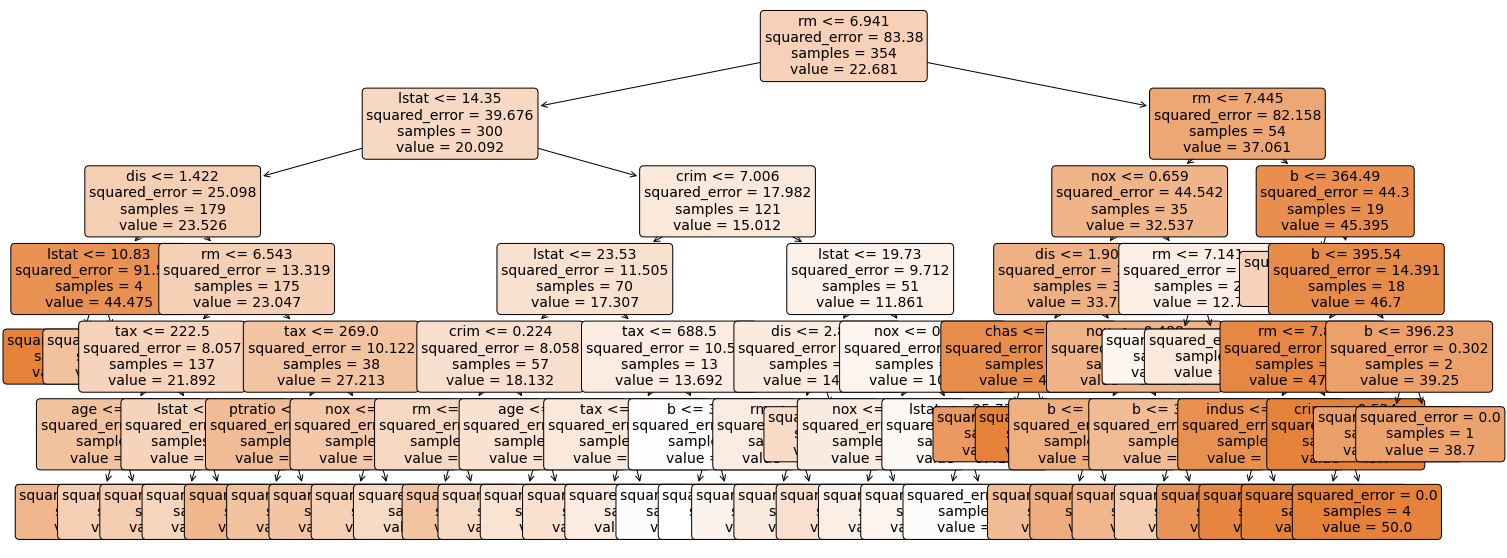

In [110]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=df.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Data Standardization

In [130]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(trainx)
X_test = sc.transform(testx)

## > SVM Regressor

In [131]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [132]:
# Train the model using the training sets 
reg.fit(X_train, trainy)

SVR()

In [134]:
# Model prediction on train data
y_pred4 = reg.predict(X_train)

In [135]:
y_pred4

array([20.81018615, 10.84492639, 20.04864176, 27.79252797, 29.1832543 ,
       27.8094231 , 29.26858794, 25.89876535, 20.9378358 , 23.16795651,
       13.54619375, 27.28022043, 23.2406293 , 24.1708613 , 21.73210924,
       14.03756359, 19.36162121, 23.07918507, 18.40306664, 13.04667227,
       19.64150165, 16.53529548, 21.76009238, 25.77307043, 23.77422196,
       19.50811178, 15.56575405, 17.05210964, 31.10004272, 22.66930789,
       23.4288748 , 32.94475121, 20.21265939, 20.65696849, 26.07812516,
       33.40376153, 16.49457842, 16.27656202, 22.05762731, 28.44487347,
       19.98971399, 21.66137209, 19.89967515, 17.97222952, 22.75997492,
       18.6471522 , 21.4163941 , 18.91373254, 27.66614639, 25.63013532,
       20.1683892 , 24.97325526, 18.41202057, 15.96238672, 14.74218281,
       23.20040726, 23.74780011, 22.43365901, 25.09389587, 25.90148792,
       21.8000863 , 23.12470857, 31.59991535, 22.9338054 , 17.59962789,
       13.47596354, 29.15711045, 31.64525729, 15.53231136, 15.54

In [140]:
r3= sm.r2_score(trainy, y_pred4) 
print('Acc :',r3*100)

Acc : 63.98986645994168


## Data Viz

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


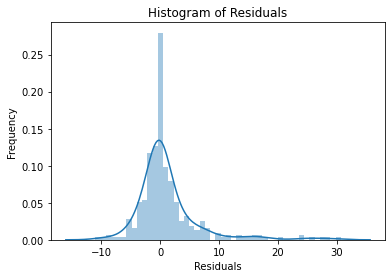

In [139]:
# Checking Normality of errors
sns.distplot(trainy-y_pred4)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

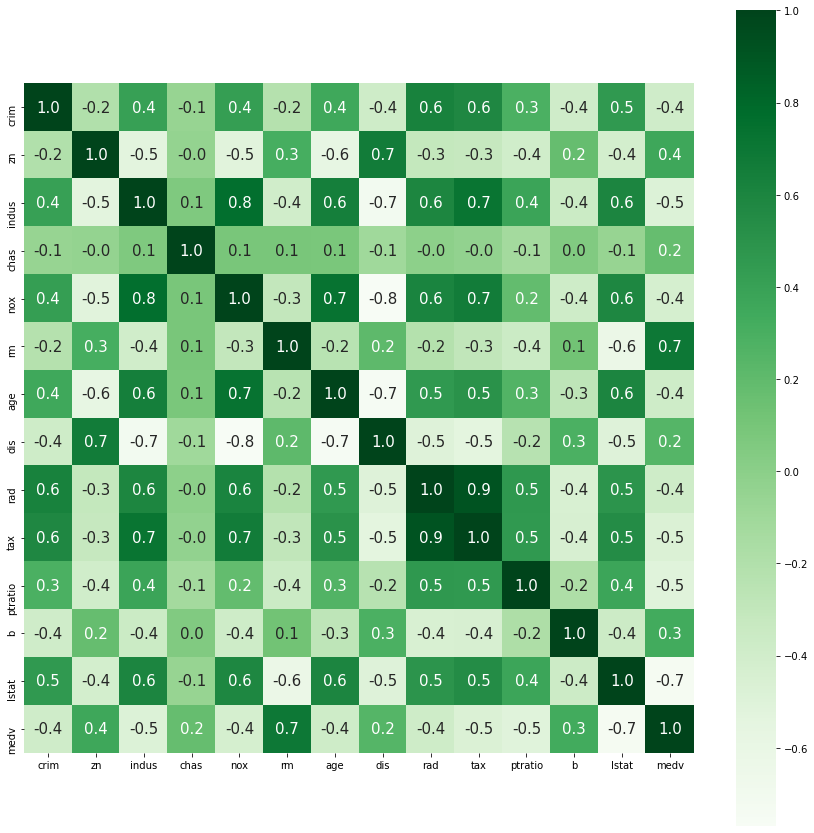

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f',annot=True, annot_kws={'size':15}, cmap='Greens')

## Evaluation and comparison of all the models

In [141]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine'],
    'R-squared Score': [r*100, r1*100, r2*100, r3*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,97.874387
2,Decision Tree,77.823929
0,Linear Regression,73.000000
3,Support Vector Machine,63.989866


Hence, Random Forest works best for this dataset.